In [1]:
# Import modules:
import gmsh
import sys
import numpy as np

In [2]:
# Simple 2d geometry:
#          D----C
#         /     |
#  F-----E      |
#  |            |
#  A------------B
h = 1.0
x_down = 15
x_slope = 10
x_up = 15
y_down = 10
y_slope = 10

In [3]:
# Initialize gmsh:
gmsh.initialize()

# Points:
A = gmsh.model.geo.add_point(x=0, y=0, z=0, meshSize=h)
B = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=0, z=0, meshSize=h)
C = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=y_down+y_slope, z=0, meshSize=h)
D = gmsh.model.geo.add_point(x=x_down+x_slope, y=y_down+y_slope, z=0, meshSize=h/2)
E = gmsh.model.geo.add_point(x=x_down, y=y_down, z=0, meshSize=h/2)
F = gmsh.model.geo.add_point(x=0, y=y_down, z=0, meshSize=h)

# Line segments:
AB = gmsh.model.geo.add_line(A, B)
BC = gmsh.model.geo.add_line(B, C)
CD = gmsh.model.geo.add_line(C, D)
DE = gmsh.model.geo.add_line(D, E)
EF = gmsh.model.geo.add_line(E, F)
FA = gmsh.model.geo.add_line(F, A)

# Closed curves:
boundary = gmsh.model.geo.add_curve_loop([AB, BC, CD, DE, EF, FA])

# Surfaces inside closed curves:
gmsh.model.geo.add_plane_surface([boundary])

# Synchronize and generate mesh:
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate()

# Write mesh data to file:
# gmsh.write("GFG.msh")

# Create graphical user interface
# if 'close' not in sys.argv:
#     gmsh.fltk.run()

# Get node coordinates:
nodeTags, nodeCoords, nodeParams = gmsh.model.mesh.getNodes()
# Get mesh elements:
elemTypes, elemTags, elemNodeTags = gmsh.model.mesh.getElements(dim=2)

# Finalize the Gmsh API
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Line)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 70%] Meshing curve 5 (Line)
Info    : [ 90%] Meshing curve 6 (Line)
Info    : Done meshing 1D (Wall 0.00337205s, CPU 0.001942s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0484596s, CPU 0.049021s)
Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 2.3839e-05s, CPU 2.4e-05s)
Info    : 1220 nodes 2444 elements


In [4]:
# Extract X- and Y- coordinates of all nodes from GMSH outputs:
node = np.array(nodeCoords)
node_X = node[0:-1:3]
node_Y = node[1:-1:3]
print("X coords:")
print(node_X)
print("Y coords:")
print(node_Y)


X coords:
[ 0.         40.         40.         ... 36.94168125 23.22021972
 20.74730909]
Y coords:
[ 0.          0.         20.         ... 14.74172013 11.93468221
  6.55561628]


In [5]:
# All (triangular) elements:
elem = elemNodeTags[0].reshape(-1,3)
elem = elem-1 # indexing from 0
print(elem.T)

[[  85  573  585 ...  803 1179  967]
 [  86  730  901 ... 1151  689 1163]
 [ 860  941  999 ... 1190 1181 1218]]


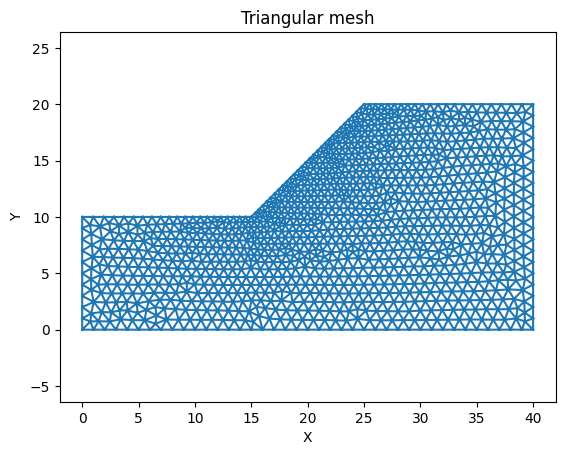

In [6]:
# Plot outside GMSH (only using node_X, node_Y, elem):
import mesh_tools

mesh = mesh_tools.Mesh2d(node_X, node_Y, elem)
mesh.plot_mesh()